In [83]:
import pandas as pd
import bibtex_tools as bt
from importlib import reload
reload(bt);
from os import path
import networkx as nx

### Test parse bibtex and add nickname functionality

In [10]:
cit_list = bt.parse_bibtex_file('sample_file.txt')
cit_list = [bt.add_nickname_field(ct) for ct in cit_list]

In [11]:
df = pd.DataFrame(cit_list)
df

,author,title,journal,year,pages,volume,number,author_list,nickname,doi
0,"Abhishek, V and Jerath, K and Zhang, Z",Agency selling or reselling? Channel structure...,Manage. Sci,2016,2259--2280,62,8,"[(Abhishek, V), (Jerath, K), (Zhang, Z)]",abhishek2016agency,NaN
1,"Affisco, J and Paknejad, M and Nasri, F",Quality improvement and setup reduction in the...,Eur. J. Oper. Res,2002,497--508,142,3,"[(Affisco, J), (Paknejad, M), (Nasri, F)]",affisco2002quality,NaN
2,"Arunachalam, D and Kumar, N and Kawalek, J",Understanding big data analytics capabilities ...,Transp. Res. Part E: Logist. Transp. Rev,2018,416--436,114,NaN,"[(Arunachalam, D), (Kumar, N), (Kawalek, J)]",arunachalam2018understanding,NaN
3,"Babich, V and Hilary, G",Distributed ledgers and operations: what opera...,Manuf. Serv. Oper. Manage,2019,NaN,NaN,NaN,"[(Babich, V), (Hilary, G)]",babich2019distributed,10.1287/msom.2018.0752
4,"Baryannis, G and Validi, S and Dani, S and Ant...",Supply chain risk management and artificial in...,Int. J. Prod. Res,2019,2179--2202,57,7,"[(Baryannis, G), (Validi, S), (Dani, S), (Anto...",baryannis2019supply,NaN
5,"Beltagui, A and Kunz, N and Gold, S",The role of 3D printing and open design on ado...,Int. J. Prod. Econ. Article in press,2019,NaN,NaN,NaN,"[(Beltagui, A), (Kunz, N), (Gold, S)]",beltagui2019role,10.1016/j.ijpe.2019.07.035
6,"Ben-Daya, M and Hariga, M",Lead-time reduction in a stochastic inventory ...,Int. J. Prod. Res,2003,571--579,41,3,"[(Ben-Daya, M), (Hariga, M)]",ben-daya2003leadtime,NaN
7,"Bernstein, F and Federgruen, A",A general equilibrium model for industries wit...,Oper. Res,2004,868--886,52,6,"[(Bernstein, F), (Federgruen, A)]",bernstein2004general,NaN
8,"Billington, P",The Classic Economic Production Quantity Model...,Decis Sci,1987,25--42,18,1,"[(Billington, P)]",billington1987classic,NaN
9,"Cai, X and Chen, J and Xiao, Y and Xu, X",Optimization and coordination of fresh product...,Prod. Oper. Manag,2010,261--278,19,3,"[(Cai, X), (Chen, J), (Xiao, Y), (Xu, X)]",cai2010optimization,NaN


## Match files and nicknames from batch1

We use the fact that tne filenames contain the author and the year in order to half-automatically match the file name with the list of nicknames. the nicknames were written one by one.

In [48]:
nicknames="""
avinadav2020revenuesharing
choi2004optimal
guo2020green
degiovanni2020blockchain
dematta2017competition
li2020reducing
liu2020impacts
shen2020selling
xu2018supply
yan2018strategic
zennyo2020strategic
zhang2020agency
zhen2020manufacturers
grieger2003electronic
jiang2017p2p
li2019etailers
mantin2014strategic
ryan2012competition
tian2018marketplace
xu2020coordination
yan2019strategic
""".split('\n')

files="""
./Tian et al 2018.ff.pdf
./De Giovanni 2020.pdf
./Xu et al 2018.pdf
./Jiang et al 2017.ff.pdf
./Zhen et al 2020.pdf
./Xu et al 2020.ff.pdf
./Shen et al 2019.pdf
./Zennyo 2020.pdf
./Li 2020.pdf
./Yan et al 2019.ff.pdf
./Grieger 2003.ff.pdf
./Ryan et al 2012.ff.pdf
./Shen et al 2020.ff.pdf
./Choi et al 2004.pdf
./de Matta et al 2017.pdf
./Guo et al 2020.pdf
./Zhang and Zhang 2020.pdf
./Mantin et al 2014.ff.pdf
./Liu et al 2020.pdf
./Avinadav et al 2020.pdf
./Yan et al 2018.pdf
./Li et al 2019.ff.pdf
""".split('\n')[1:]

### Get the list of authors from the file names

In [49]:
auths = [a.strip('./').split(' ')[0].lower() for a in files if a]
auths

['tian',
 'de',
 'xu',
 'jiang',
 'zhen',
 'xu',
 'shen',
 'zennyo',
 'li',
 'yan',
 'grieger',
 'ryan',
 'shen',
 'choi',
 'de',
 'guo',
 'zhang',
 'mantin',
 'liu',
 'avinadav',
 'yan',
 'li']

### now a simple heuristic to look for each author name in each nickname and output all matches

In [50]:
candidates =[[v for i,v in enumerate(nicknames) if auth in v] for auth in auths]
candidates

[['tian2018marketplace'],
 ['degiovanni2020blockchain', 'dematta2017competition'],
 ['xu2018supply', 'xu2020coordination'],
 ['jiang2017p2p'],
 ['zhen2020manufacturers'],
 ['xu2018supply', 'xu2020coordination'],
 ['shen2020selling'],
 ['zennyo2020strategic'],
 ['li2020reducing', 'liu2020impacts', 'shen2020selling', 'li2019etailers'],
 ['yan2018strategic', 'ryan2012competition', 'yan2019strategic'],
 ['grieger2003electronic'],
 ['ryan2012competition'],
 ['shen2020selling'],
 ['choi2004optimal'],
 ['degiovanni2020blockchain', 'dematta2017competition'],
 ['guo2020green'],
 ['zhang2020agency'],
 ['mantin2014strategic'],
 ['liu2020impacts'],
 ['avinadav2020revenuesharing'],
 ['yan2018strategic', 'ryan2012competition', 'yan2019strategic'],
 ['li2020reducing', 'liu2020impacts', 'shen2020selling', 'li2019etailers']]

Now we manually choose the index of the correct nickname, this gives us the dictionary matching file names with nicknames

In [51]:
d1 = {f: c[j] for f,c,j in zip(files, candidates,[0,0,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,3])}
d1

{'./Tian et al 2018.ff.pdf': 'tian2018marketplace',
 './De Giovanni 2020.pdf': 'degiovanni2020blockchain',
 './Xu et al 2018.pdf': 'xu2018supply',
 './Jiang et al 2017.ff.pdf': 'jiang2017p2p',
 './Zhen et al 2020.pdf': 'zhen2020manufacturers',
 './Xu et al 2020.ff.pdf': 'xu2020coordination',
 './Shen et al 2019.pdf': 'shen2020selling',
 './Zennyo 2020.pdf': 'zennyo2020strategic',
 './Li 2020.pdf': 'li2020reducing',
 './Yan et al 2019.ff.pdf': 'yan2019strategic',
 './Grieger 2003.ff.pdf': 'grieger2003electronic',
 './Ryan et al 2012.ff.pdf': 'ryan2012competition',
 './Shen et al 2020.ff.pdf': 'shen2020selling',
 './Choi et al 2004.pdf': 'choi2004optimal',
 './de Matta et al 2017.pdf': 'dematta2017competition',
 './Guo et al 2020.pdf': 'guo2020green',
 './Zhang and Zhang 2020.pdf': 'zhang2020agency',
 './Mantin et al 2014.ff.pdf': 'mantin2014strategic',
 './Liu et al 2020.pdf': 'liu2020impacts',
 './Avinadav et al 2020.pdf': 'avinadav2020revenuesharing',
 './Yan et al 2018.pdf': 'yan2018

In the second list, similar work was performed by adding manually the first word from the article's title.

In [59]:
files2="""
./Avinadav et al 2015a.pdf : effect
./Avinadav et al 2015b.pdf : consignment
./Avinadav et al 2017.pdf : mergers 
./Avinadav et al 2019.pdf : effect
./Avinadav et al 2020b.pdf : contract
./Cao et al 2019.pdf : optimal
./Cao et al 2020.pdf : whether
./Chen et al 2020.pdf : promotional
./Chernonog 2020.pdf : strategic
./Geng et al 2018.pdf : addon
./Hagiu and Wright 2020.pdf : marketplace
./Hua et al 2020.pdf : newsvendor
./Li et al 2016.pdf : predicting
./Lin et al 2020.pdf : platform
./Luo et al 2020.pdf : impacts
./Qin et al 2020b.pdf : strategic
./Renna 2010.pdf : negotiation
./Schlosser and Boissier 2018.pdf : dealing
./Sun et al 2020.pdf : fulfillment
./Yenipazarli 2020.pdf : marketplace
./Yu and Zhang 2017.pdf : data
./Zhang and Zhang 2019.pdf : contract
./Zhao and Bisi 2010.pdf : optimal
./Zhou et al 2019.pdf : contract
""".split('\n')[1:]

In [62]:
d2 = {}
for rec in [f.split(' : ') for f in files2[:-1]]:
    first_author = rec[0].strip('./').split(' ')[0]
    year = rec[0].rstrip('ab.pdf').split(' ')[-1]
    d2[rec[0]] = "{}{}{}".format(first_author,year,rec[1]).lower()
    
d2

{'./Avinadav et al 2015a.pdf': 'avinadav2015effect',
 './Avinadav et al 2015b.pdf': 'avinadav2015consignment',
 './Avinadav et al 2017.pdf': 'avinadav2017mergers ',
 './Avinadav et al 2019.pdf': 'avinadav2019effect',
 './Avinadav et al 2020b.pdf': 'avinadav2020contract',
 './Cao et al 2019.pdf': 'cao2019optimal',
 './Cao et al 2020.pdf': 'cao2020whether',
 './Chen et al 2020.pdf': 'chen2020promotional',
 './Chernonog 2020.pdf': 'chernonog2020strategic',
 './Geng et al 2018.pdf': 'geng2018addon',
 './Hagiu and Wright 2020.pdf': 'hagiu2020marketplace',
 './Hua et al 2020.pdf': 'hua2020newsvendor',
 './Li et al 2016.pdf': 'li2016predicting',
 './Lin et al 2020.pdf': 'lin2020platform',
 './Luo et al 2020.pdf': 'luo2020impacts',
 './Qin et al 2020b.pdf': 'qin2020strategic',
 './Renna 2010.pdf': 'renna2010negotiation',
 './Schlosser and Boissier 2018.pdf': 'schlosser2018dealing',
 './Sun et al 2020.pdf': 'sun2020fulfillment',
 './Yenipazarli 2020.pdf': 'yenipazarli2020marketplace',
 './Yu an

In [63]:
d= dict(**d1, **d2)
d

{'./Tian et al 2018.ff.pdf': 'tian2018marketplace',
 './De Giovanni 2020.pdf': 'degiovanni2020blockchain',
 './Xu et al 2018.pdf': 'xu2018supply',
 './Jiang et al 2017.ff.pdf': 'jiang2017p2p',
 './Zhen et al 2020.pdf': 'zhen2020manufacturers',
 './Xu et al 2020.ff.pdf': 'xu2020coordination',
 './Shen et al 2019.pdf': 'shen2020selling',
 './Zennyo 2020.pdf': 'zennyo2020strategic',
 './Li 2020.pdf': 'li2020reducing',
 './Yan et al 2019.ff.pdf': 'yan2019strategic',
 './Grieger 2003.ff.pdf': 'grieger2003electronic',
 './Ryan et al 2012.ff.pdf': 'ryan2012competition',
 './Shen et al 2020.ff.pdf': 'shen2020selling',
 './Choi et al 2004.pdf': 'choi2004optimal',
 './de Matta et al 2017.pdf': 'dematta2017competition',
 './Guo et al 2020.pdf': 'guo2020green',
 './Zhang and Zhang 2020.pdf': 'zhang2020agency',
 './Mantin et al 2014.ff.pdf': 'mantin2014strategic',
 './Liu et al 2020.pdf': 'liu2020impacts',
 './Avinadav et al 2020.pdf': 'avinadav2020revenuesharing',
 './Yan et al 2018.pdf': 'yan2018

In [45]:
bibs = [path.abspath(path.join('..','articles_from_tatiana',f'fulltext-pdf-batch{i}','all_refs.txt')) 
        for i in [1,2]
       ]
print(path.exists(bibs[0]),path.exists(bibs[1]))

True True


### Test that all papers are matched in d

In [64]:
with open(bibs[0],'rt') as f:
    for num, row in enumerate(f):
        row = row.rstrip()
        if row.startswith('./'):
            if row in d:
                print(f'matching {row} with {d[row]} in line {num}')
            else:
                print(f'key not found {row} in row {num}')

matching ./Tian et al 2018.ff.pdf with tian2018marketplace in line 0
matching ./De Giovanni 2020.pdf with degiovanni2020blockchain in line 330
matching ./Xu et al 2018.pdf with xu2018supply in line 789
matching ./Jiang et al 2017.ff.pdf with jiang2017p2p in line 2017
matching ./Zhen et al 2020.pdf with zhen2020manufacturers in line 2314
matching ./Xu et al 2020.ff.pdf with xu2020coordination in line 2885
matching ./Shen et al 2019.pdf with shen2020selling in line 3429
matching ./Zennyo 2020.pdf with zennyo2020strategic in line 3832
matching ./Li 2020.pdf with li2020reducing in line 4088
matching ./Yan et al 2019.ff.pdf with yan2019strategic in line 4558
matching ./Grieger 2003.ff.pdf with grieger2003electronic in line 4977
matching ./Ryan et al 2012.ff.pdf with ryan2012competition in line 5427
matching ./Shen et al 2020.ff.pdf with shen2020selling in line 5812
matching ./Choi et al 2004.pdf with choi2004optimal in line 6295
matching ./de Matta et al 2017.pdf with dematta2017competition

In [65]:
with open(bibs[1],'rt') as f:
    for num, row in enumerate(f):
        row = row.rstrip()
        if row.startswith('./'):
            if row in d:
                print(f'matching {row} with {d[row]} in line {num}')
            else:
                print(f'key not found {row} in row {num}')

matching ./Cao et al 2020.pdf with cao2020whether in line 0
matching ./Chen et al 2020.pdf with chen2020promotional in line 591
matching ./Cao et al 2019.pdf with cao2019optimal in line 1232
matching ./Sun et al 2020.pdf with sun2020fulfillment in line 1641
matching ./Hagiu and Wright 2020.pdf with hagiu2020marketplace in line 2123
matching ./Avinadav et al 2015a.pdf with avinadav2015effect in line 2398
matching ./Hua et al 2020.pdf with hua2020newsvendor in line 2829
matching ./Li et al 2016.pdf with li2016predicting in line 3254
matching ./Lin et al 2020.pdf with lin2020platform in line 3596
matching ./Avinadav et al 2017.pdf with avinadav2017mergers  in line 4024
matching ./Renna 2010.pdf with renna2010negotiation in line 4378
matching ./Schlosser and Boissier 2018.pdf with schlosser2018dealing in line 4639
matching ./Avinadav et al 2019.pdf with avinadav2019effect in line 4917
matching ./Avinadav et al 2015b.pdf with avinadav2015consignment in line 5850
matching ./Yenipazarli 2020.

### build graph in networkx

In [71]:
node_labels = set(d.values())



In [73]:
pwd

'/home/siegman/Documents/Shahar/years/y2021/t_and_t/code'

In [85]:
reload(bt);

with open('../articles_from_tatiana/fulltext-pdf-batch1/all_refs.txt','rt') as a:
    batch1_references = bt.parse_bibtex_file(a,'batch1',lambda s: s.rstrip() if s.startswith('./') else '')

In [93]:
reload(bt);

with open('../articles_from_tatiana/fulltext-pdf-batch2/all_refs.txt','rt') as a:
    batch2_references = bt.parse_bibtex_file(a,'batch2',lambda s: s.rstrip() if s.startswith('./') else '')

In [94]:
list(batch2_references.keys())

['./Cao et al 2020.pdf',
 './Chen et al 2020.pdf',
 './Cao et al 2019.pdf',
 './Sun et al 2020.pdf',
 './Hagiu and Wright 2020.pdf',
 './Avinadav et al 2015a.pdf',
 './Hua et al 2020.pdf',
 './Li et al 2016.pdf',
 './Lin et al 2020.pdf',
 './Avinadav et al 2017.pdf',
 './Renna 2010.pdf',
 './Schlosser and Boissier 2018.pdf',
 './Avinadav et al 2019.pdf',
 './Avinadav et al 2015b.pdf',
 './Yenipazarli 2020.pdf',
 './Chernonog 2020.pdf',
 './Zhou et al 2019.pdf',
 './Avinadav et al 2020b.pdf',
 './Yu and Zhang 2017.pdf',
 './Zhang and Zhang 2019.pdf',
 './Zhao and Bisi 2010.pdf',
 './Luo et al 2020.pdf',
 './Geng et al 2018.pdf']

In [95]:
batch1_references['./Tian et al 2018.ff.pdf']

[{'author': 'Abhishek, V and Jerath, K and Zhang, Z',
  'title': 'To platform-sell or resell? Channel structures in electronic retailing',
  'journal': 'Management Sci',
  'year': '2016',
  'pages': '2259--2280',
  'volume': '62',
  'number': '8',
  'author_list': [('Abhishek', 'V'), ('Jerath', 'K'), ('Zhang', 'Z')],
  'nickname': 'abhishek2016to',
  'source': 'batch1'},
 {'author': 'Agatz, N and Fleischmann, M and Van Nunen, J',
  'title': 'E-fulfillment and multi-channel distribution: A review',
  'journal': 'Eur. J. Oper. Res',
  'year': '2008',
  'pages': '339--356',
  'volume': '187',
  'number': '2',
  'author_list': [('Agatz', 'N'), ('Fleischmann', 'M'), ('Van Nunen', 'J')],
  'nickname': 'agatz2008efulfillment',
  'source': 'batch1'},
 {'author': 'Birge, J and Drogosz, J and Duenyas, I',
  'title': 'Setting single-period optimal capacity levels and prices for substitutable products',
  'journal': 'Int. J. Flex. Manuf. Syst',
  'year': '1998',
  'pages': '407--430',
  'volume': 

In [96]:
batch2_references['./Cao et al 2020.pdf']

[{'author': 'Abdulla, H and Ketzenberg, M and Abbey, J',
  'title': 'Taking stock of consumer returns: a review and classification of the literature',
  'journal': 'Journal of Operations Management',
  'year': '2019',
  'pages': '560--605',
  'volume': '65',
  'author_list': [('Abdulla', 'H'), ('Ketzenberg', 'M'), ('Abbey', 'J')],
  'nickname': 'abdulla2019taking',
  'source': 'batch2'},
 {'author': 'Altug, M and Aydinliyim, T',
  'title': "Counteracting strategic purchase deferrals: the impact of online retailers' return policy decisions",
  'journal': 'Manufacturing & Service Operations Management',
  'year': '2016',
  'pages': '376--392',
  'volume': '18',
  'author_list': [('Altug', 'M'), ('Aydinliyim', 'T')],
  'nickname': 'altug2016counteracting',
  'source': 'batch2'},
 {'author': 'Amazon',
  'title': 'Amazon Investor Relations',
  'year': '2018. 2018',
  'volume': '13',
  'author_list': [('Amazon',)],
  'nickname': 'amazon2018._2018amazon',
  'source': 'batch2'},
 {'author': 'A

In [97]:
from collections import Counter

In [103]:
Counter(sum([[(a['nickname'] in node_labels) for a in b] for b in batch1_references.values()],[]))

Counter({False: 1067, True: 39})

In [100]:
type(batch1_references)

dict

In [104]:
Counter(sum([[(a['nickname'] in node_labels) for a in b] for b in batch2_references.values()],[]))

Counter({False: 1061, True: 20})

In [154]:
gr = nx.DiGraph()
gr.add_nodes_from(node_labels)
edge_id = 1000

for source_node, references in batch1_references.items():
    for reference in references:
        if reference['nickname'] in node_labels:
            gr.add_edge(reference['nickname'], d[source_node], id=edge_id, type='arrow')
            edge_id +=1

for source_node, references in batch2_references.items():
    for reference in references:
        if reference['nickname'] in node_labels:
            gr.add_edge(reference['nickname'], d[source_node], id=edge_id, type='arrow')
            edge_id += 1


In [155]:
locs = nx.drawing.layout.spring_layout(gr)

nx.set_node_attributes(gr, {k: {'x': round(v[0],3) , 'y': round(v[1],3), 'size': 3, 'label': k, } for k, v in locs.items()})

gr.nodes(data=True)

NodeDataView({'hagiu2020marketplace': {'x': 0.953, 'y': -0.077, 'size': 3, 'label': 'hagiu2020marketplace'}, 'li2019etailers': {'x': 0.758, 'y': 0.518, 'size': 3, 'label': 'li2019etailers'}, 'yan2019strategic': {'x': -0.451, 'y': 0.0, 'size': 3, 'label': 'yan2019strategic'}, 'avinadav2015effect': {'x': -0.007, 'y': 0.772, 'size': 3, 'label': 'avinadav2015effect'}, 'cao2019optimal': {'x': 0.002, 'y': -0.364, 'size': 3, 'label': 'cao2019optimal'}, 'mantin2014strategic': {'x': -0.385, 'y': -0.056, 'size': 3, 'label': 'mantin2014strategic'}, 'yu2017data': {'x': 0.682, 'y': 0.691, 'size': 3, 'label': 'yu2017data'}, 'li2016predicting': {'x': 0.896, 'y': 0.248, 'size': 3, 'label': 'li2016predicting'}, 'cao2020whether': {'x': 0.607, 'y': -0.835, 'size': 3, 'label': 'cao2020whether'}, 'jiang2017p2p': {'x': -0.639, 'y': -0.501, 'size': 3, 'label': 'jiang2017p2p'}, 'tian2018marketplace': {'x': -0.228, 'y': -0.061, 'size': 3, 'label': 'tian2018marketplace'}, 'xu2018supply': {'x': 0.261, 'y': -0.90

In [127]:
list(gr.adjacency())

[('hagiu2020marketplace', {}),
 ('li2019etailers', {}),
 ('yan2019strategic',
  {'zhen2020manufacturers': {'id': 1005},
   'xu2020coordination': {'id': 1010},
   'zennyo2020strategic': {'id': 1015},
   'chen2020promotional': {'id': 1044}}),
 ('avinadav2015effect', {}),
 ('cao2019optimal',
  {'cao2020whether': {'id': 1039}, 'zhang2019contract': {'id': 1054}}),
 ('mantin2014strategic',
  {'jiang2017p2p': {'id': 1002},
   'yan2019strategic': {'id': 1019},
   'liu2020impacts': {'id': 1030},
   'yan2018strategic': {'id': 1035},
   'chen2020promotional': {'id': 1040},
   'cao2019optimal': {'id': 1046}}),
 ('yu2017data', {}),
 ('li2016predicting', {}),
 ('cao2020whether', {}),
 ('jiang2017p2p', {}),
 ('tian2018marketplace',
  {'xu2020coordination': {'id': 1008},
   'shen2020selling': {'id': 1024},
   'zennyo2020strategic': {'id': 1013},
   'li2020reducing': {'id': 1017},
   'guo2020green': {'id': 1028},
   'li2019etailers': {'id': 1037},
   'chen2020promotional': {'id': 1042},
   'yenipazarli

In [112]:
list(gr.nodes())

['hagiu2020marketplace',
 'li2019etailers',
 'yan2019strategic',
 'avinadav2015effect',
 'cao2019optimal',
 'mantin2014strategic',
 'yu2017data',
 'li2016predicting',
 'cao2020whether',
 'jiang2017p2p',
 'tian2018marketplace',
 'xu2018supply',
 'schlosser2018dealing',
 'li2020reducing',
 'avinadav2019effect',
 'zhang2020agency',
 'yenipazarli2020marketplace',
 'chernonog2020strategic',
 'guo2020green',
 'xu2020coordination',
 'zennyo2020strategic',
 'avinadav2017mergers ',
 'avinadav2020contract',
 'choi2004optimal',
 'zhen2020manufacturers',
 'grieger2003electronic',
 'zhang2019contract',
 'liu2020impacts',
 'lin2020platform',
 'sun2020fulfillment',
 'dematta2017competition',
 'luo2020impacts',
 'yan2018strategic',
 'hua2020newsvendor',
 'chen2020promotional',
 'shen2020selling',
 'renna2010negotiation',
 'zhou2019contract',
 'avinadav2020revenuesharing',
 'qin2020strategic',
 'geng2018addon',
 'ryan2012competition',
 'degiovanni2020blockchain',
 'zhao2010optimal',
 'avinadav2015consi

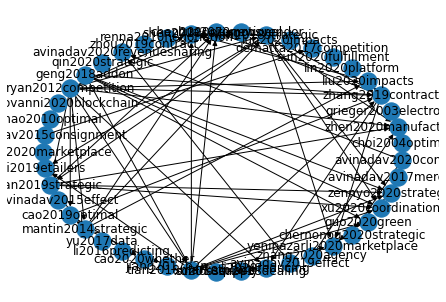

In [117]:
nx.draw_shell(gr, with_labels=True)

In [156]:
# following code adapted from https://functionliteral.blogspot.com/2017/05/networkx-to-sigmajs-graph-generator.html
import json
from networkx.readwrite import json_graph

fixNG = json_graph.node_link_data(gr)
    # Fixes the network so that edges use node names instead of integers
# Stringifies the json
fixNG = str(json.dumps(fixNG))
# Changes links to edges to comply with Sigma.JS
rtnNG = fixNG.replace('links', 'edges')



In [157]:
print(rtnNG)

{"directed": true, "multigraph": false, "graph": {}, "nodes": [{"x": 0.953, "y": -0.077, "size": 3, "label": "hagiu2020marketplace", "id": "hagiu2020marketplace"}, {"x": 0.758, "y": 0.518, "size": 3, "label": "li2019etailers", "id": "li2019etailers"}, {"x": -0.451, "y": 0.0, "size": 3, "label": "yan2019strategic", "id": "yan2019strategic"}, {"x": -0.007, "y": 0.772, "size": 3, "label": "avinadav2015effect", "id": "avinadav2015effect"}, {"x": 0.002, "y": -0.364, "size": 3, "label": "cao2019optimal", "id": "cao2019optimal"}, {"x": -0.385, "y": -0.056, "size": 3, "label": "mantin2014strategic", "id": "mantin2014strategic"}, {"x": 0.682, "y": 0.691, "size": 3, "label": "yu2017data", "id": "yu2017data"}, {"x": 0.896, "y": 0.248, "size": 3, "label": "li2016predicting", "id": "li2016predicting"}, {"x": 0.607, "y": -0.835, "size": 3, "label": "cao2020whether", "id": "cao2020whether"}, {"x": -0.639, "y": -0.501, "size": 3, "label": "jiang2017p2p", "id": "jiang2017p2p"}, {"x": -0.228, "y": -0.06